<a href="https://colab.research.google.com/github/NabilahSharfina/Ruangguru-Bootcamp/blob/main/Product_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# load data from google

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Data

## Table inventory_items

In [49]:
inv_items = pd.read_csv('/content/drive/MyDrive/KAMPUS MERDEKA BATCH 2/Project Ruang Guru Kel 255/Dataset Final Project DBA/inventory_items.csv')
inv_items.head()

,id,product_id,created_at,sold_at,cost,product_category,product_name,product_brand,product_retail_price,product_department,product_sku,product_distribution_center_id
0,90967,16898,2021-07-19 02:20:10+00:00,2021-07-20 14:34:10+00:00,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
1,90968,16898,2020-04-13 07:46:00+00:00,NaN,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
2,90969,16898,2020-09-02 17:43:00+00:00,NaN,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
3,90970,16898,2021-08-19 15:17:00+00:00,NaN,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3
4,96715,16898,2020-05-09 11:16:10+00:00,2020-06-23 23:59:10+00:00,13.92499997,Tops & Tees,Quiksilver Waterman Men's On The Rise,NaN,25.00000000,Men,22811EE19846217512507785E74D12CC,3


In [ ]:
inv_items.shape

(487394, 12)

In [ ]:
inv_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487394 entries, 0 to 487393
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              487394 non-null  int64  
 1   product_id                      487394 non-null  int64  
 2   created_at                      487394 non-null  object 
 3   sold_at                         180508 non-null  object 
 4   cost                            487394 non-null  float64
 5   product_category                487394 non-null  object 
 6   product_name                    487359 non-null  object 
 7   product_brand                   487020 non-null  object 
 8   product_retail_price            487394 non-null  float64
 9   product_department              487394 non-null  object 
 10  product_sku                     487394 non-null  object 
 11  product_distribution_center_id  487394 non-null  int64  
dtypes: float64(2), i

**Keterangan:**
1. Dataframe memiliki total 487.394 baris dan 12 kolom.
2. Dataframe masih memiliki *null values* di kolom `sold_at`.
3. Target klasifikasi adalah kolom `product_distribution_center_id` dengan tipe data `int64`
4. Berarti sisanya adalah *feature* (predictor)

Dari informasi di atas, bisa dikelompokkan kolom kategorical dan numerical sebagai berikut:

In [ ]:
# Kelompok categorical & numerical
inv_cats = ['created_at', 'sold_at', 'product_category', 'product_name', 'product_brand', 'product_department', 'product_sku']
inv_nums = ['id', 'product_id', 'cost', 'product_retail_price', 'product_distribution_center_id']

In [ ]:
inv_items.columns.values

array(['id', 'product_id', 'created_at', 'sold_at', 'cost',
       'product_category', 'product_name', 'product_brand',
       'product_retail_price', 'product_department', 'product_sku',
       'product_distribution_center_id'], dtype=object)

In [ ]:
inv_items.dtypes

id                                  int64
product_id                          int64
created_at                         object
sold_at                            object
cost                              float64
product_category                   object
product_name                       object
product_brand                      object
product_retail_price              float64
product_department                 object
product_sku                        object
product_distribution_center_id      int64
dtype: object

In [ ]:
inv_items.count()

id                                487394
product_id                        487394
created_at                        487394
sold_at                           180508
cost                              487394
product_category                  487394
product_name                      487359
product_brand                     487020
product_retail_price              487394
product_department                487394
product_sku                       487394
product_distribution_center_id    487394
dtype: int64

### A. Read Data with Indexing Time

> Referensi 
1. https://github.com/Bounteous-Inc/Time-Series-Prediction/blob/master/Time%20Series%20Prediction%20Temp.ipynb
2. https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-one/
3. https://www.bounteous.com/insights/2020/09/15/forecasting-time-series-model-using-python-part-two/

In [63]:
inv_items.dropna(subset=['sold_at'], inplace=True)

inv_items['date'] = inv_items['sold_at'].apply(lambda x : x[:10])

df_items_series = pd.DataFrame(inv_items[inv_items['product_category'] == 'Outerwear & Coats'].groupby('date').count()['id'])

df_items_series_new = df_items_series[-150:]
df_items_series_new = df_items_series_new.reset_index()

# Set type object to type datetime
df_items_series_new['date'] = pd.to_datetime(df_items_series_new['date'])
df_items_series_new

,date,id
0,2022-01-08,12
1,2022-01-09,14
2,2022-01-10,19
3,2022-01-11,19
4,2022-01-12,16
...,...,...
145,2022-06-02,61
146,2022-06-03,24
147,2022-06-04,21
148,2022-06-05,8


In [53]:
# Detail info data inventory_items
df_items_series_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    150 non-null    datetime64[ns]
 1   id      150 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


In [64]:
# Set the date as index 
df_items_series_new = df_items_series_new.set_index('date')

# Select the proper time period for weekly aggreagation
df_items_series_new = df_items_series_new['2022-01-01':'2022-12-31'].resample('W').sum()
df_items_series_new

,id
date,
2022-01-09,26
2022-01-16,127
2022-01-23,90
2022-01-30,107
2022-02-06,133
2022-02-13,106
2022-02-20,109
2022-02-27,124
2022-03-06,147


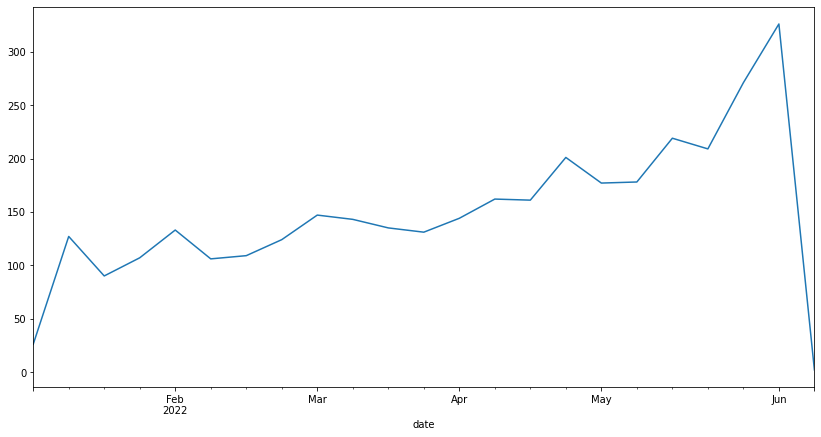

In [66]:
# Visualization data di bulan Januari 2022 - Desember 2022
df_items_series_new['id'].plot(figsize=(14, 7))

### B. Visualization Data

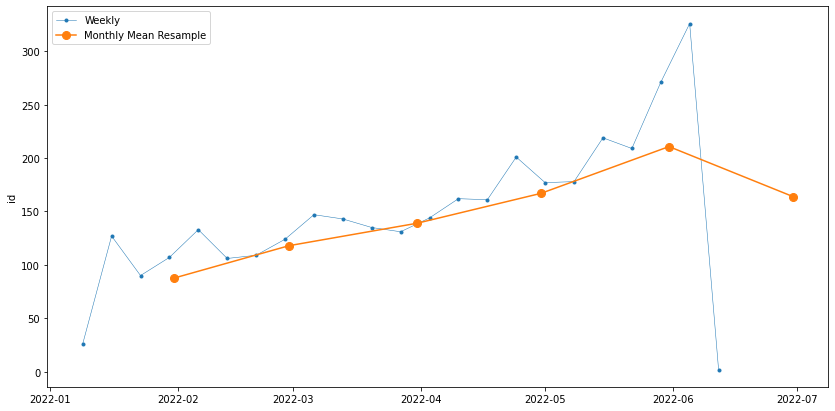

In [67]:
# Visualization data
import matplotlib.pyplot as plt

y = df_items_series_new['id']
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.set_ylabel('id')
ax.legend();

### C. Decomposing Data

In [68]:
import statsmodels.api as sm

# Graphs to show seasonal_decompose
def seasonal_decompose (y):
    decomposition = sm.tsa.seasonal_decompose(y, model='additive', extrapolate_trend='freq')
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()

seasonal_decompose(y)

ValueError: ignored

### D. Checking Stationary

#### 1. Visualization: Graphing the rolling statistics

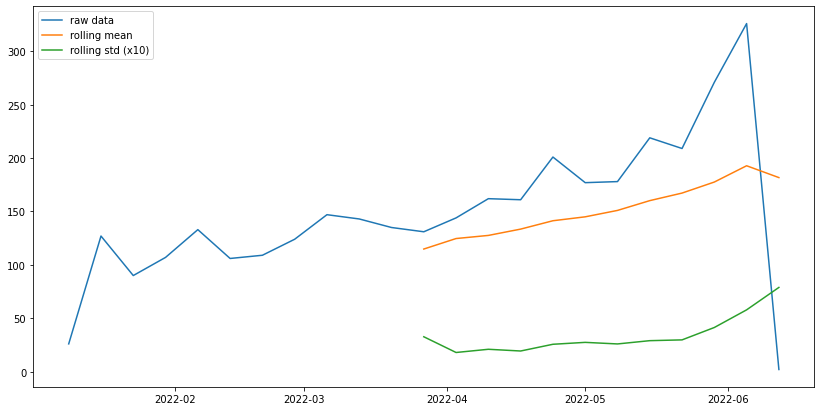

In [70]:
# Plot for Rolling Statistic for testing Stationarity
def test_stationarity(timeseries, title):
    
    # Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=12).mean() 
    rolstd = pd.Series(timeseries).rolling(window=12).std()
    
    fig, ax = plt.subplots(figsize=(14, 7))
    ax.plot(timeseries, label= title)
    ax.plot(rolmean, label='rolling mean');
    ax.plot(rolstd, label='rolling std (x10)');
    ax.legend()

pd.options.display.float_format = '{:.8f}'.format
test_stationarity(y, 'raw data')

#### 2. Augmented Dickey-Fuller Test

In [71]:
# Augmented Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller

def ADF_test(timeseries, dataDesc):
    print('> Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('\tTest statistic = {:.3f}'.format(dftest[0]))
    print('\tP-value = {:.3f}'.format(dftest[1]))
    print('\tCritical values\t:')
    for k, v in dftest[4].items():
        print('\t\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

ADF_test(y, 'raw data')

> Is the raw data stationary ?
	Test statistic = 1.199
	P-value = 0.996
	Critical values	:
		1%: -3.9644434814814815 - The data is not stationary with 99% confidence
		5%: -3.0849081481481484 - The data is not stationary with 95% confidence
		10%: -2.6818144444444445 - The data is not stationary with 90% confidence


#### 3. Detrending

> Is the de-trended data stationary ?
	Test statistic = -2.949
	P-value = 0.040
	Critical values	:
		1%: -4.6651863281249994 - The data is not stationary with 99% confidence
		5%: -3.3671868750000002 - The data is not stationary with 95% confidence
		10%: -2.802960625 - The data is  stationary with 90% confidence


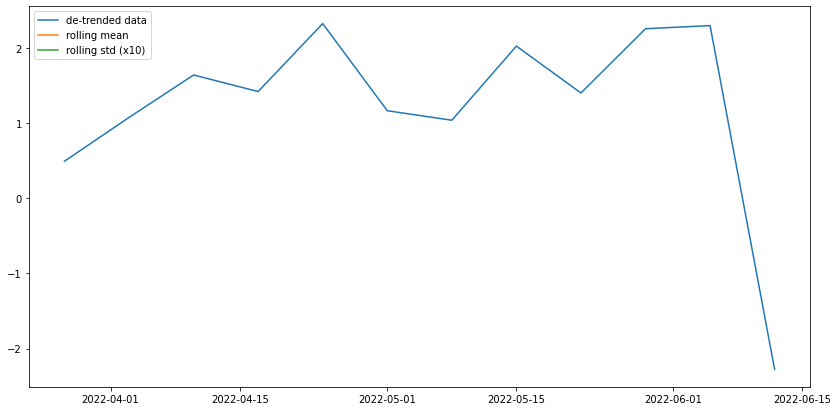

In [72]:
# Detrending
y_detrend =  (y - y.rolling(window=12).mean())/y.rolling(window=12).std()

test_stationarity(y_detrend, 'de-trended data')
ADF_test(y_detrend, 'de-trended data')

#### 4. Differencing

> Is the 12 lag differenced data stationary ?
	Test statistic = -3.588
	P-value = 0.006
	Critical values	:
		1%: -4.331573 - The data is not stationary with 99% confidence
		5%: -3.23295 - The data is  stationary with 95% confidence
		10%: -2.7487 - The data is  stationary with 90% confidence


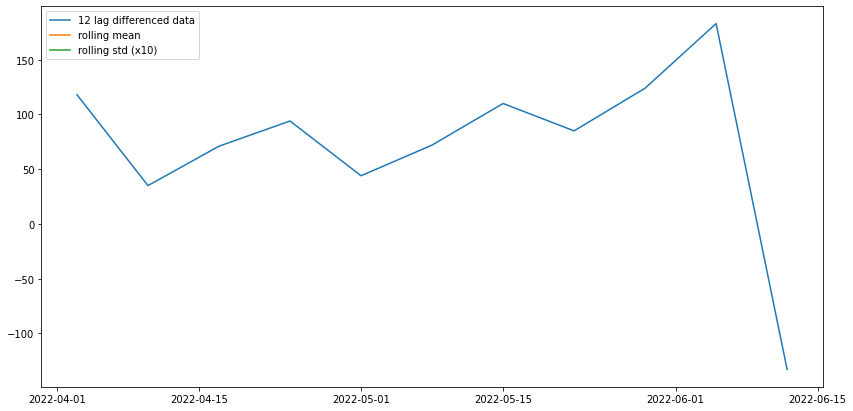

In [73]:
# Differencing
y_12lag =  y - y.shift(12)

test_stationarity(y_12lag, '12 lag differenced data')
ADF_test(y_12lag, '12 lag differenced data')

#### 5. Detrending & Differencing

> Is the 12 lag differenced de-trended data stationary ?


ValueError: ignored

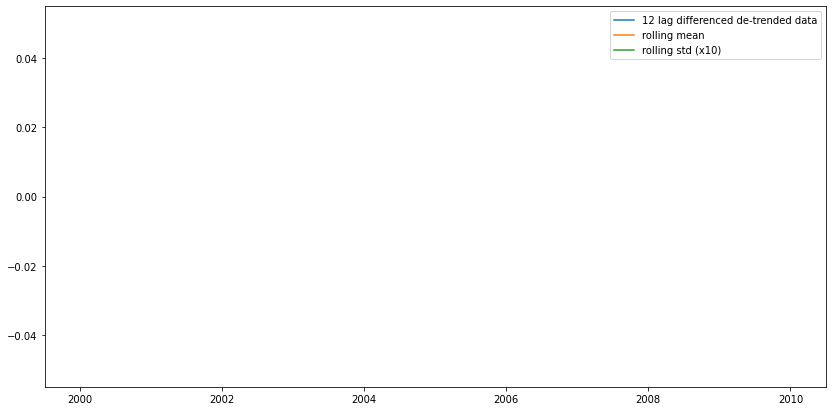

In [74]:
# Detrending + Differencing
y_12lag_detrend =  y_detrend - y_detrend.shift(12)

test_stationarity(y_12lag_detrend, '12 lag differenced de-trended data')
ADF_test(y_12lag_detrend, '12 lag differenced de-trended data')

### E. Set Data Train, Test, Length

In [76]:
y_to_train = y[:'2022-05-24'] # dataset to train
y_to_val = y['2022-06-06':] # last X months for test  
predict_date = len(y) - len(y[:'2022-06-06']) # the number of data points for the test set

### F. Different Time Series Prediction Models

#### 1. Simple Exponential Smoothing


The Root Mean Squared Error of our forecasts with smoothing level of 0.8 is nan
The Root Mean Squared Error of our forecasts with auto optimization is nan


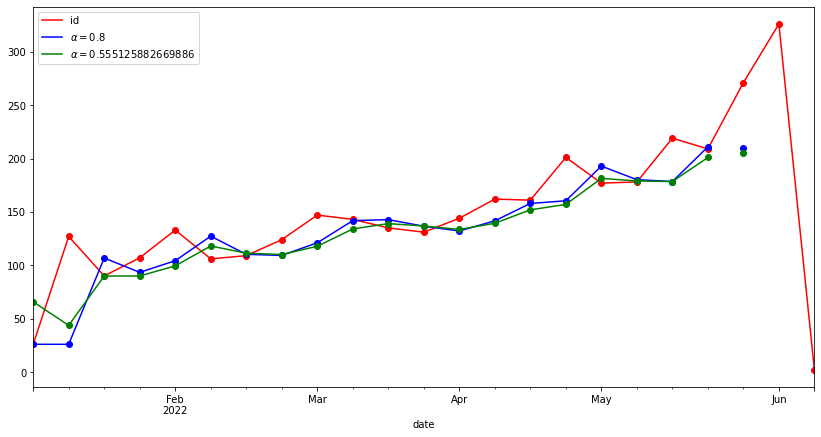

In [77]:
from statsmodels.tsa.api import SimpleExpSmoothing 

def ses(y, y_to_train, y_to_test, smoothing_level, predict_date):
    y.plot(marker='o', color='red', legend=True, figsize=(14, 7))
    
    fit1 = SimpleExpSmoothing(y_to_train).fit(smoothing_level=smoothing_level, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename(r'$\alpha={}$'.format(smoothing_level))
    # Specific smoothing level
    fcast1.plot(marker='o', color='blue', legend=True)
    fit1.fittedvalues.plot(marker='o',  color='blue')
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with smoothing level of {} is {}'.format(smoothing_level, round(np.sqrt(mse1), 2)))
    
    # Auto optimization
    fit2 = SimpleExpSmoothing(y_to_train).fit()
    fcast2 = fit2.forecast(predict_date).rename(r'$\alpha=%s$'%fit2.model.params['smoothing_level'])
    # Plot
    fcast2.plot(marker='o', color='green', legend=True)
    fit2.fittedvalues.plot(marker='o', color='green')
    
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of our forecasts with auto optimization is {}'.format(round(np.sqrt(mse2), 2)))
    
    plt.show()

ses(y, y_to_train, y_to_val, 0.8, predict_date)

#### 2. Holt

The Root Mean Squared Error of Holts Linear trend nan
The Root Mean Squared Error of Holts Exponential trend nan


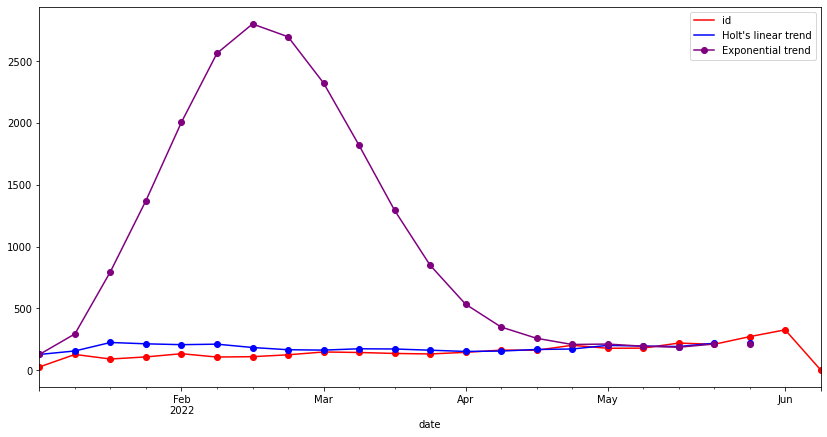

In [79]:
from statsmodels.tsa.api import Holt

def holt(y,y_to_train,y_to_test,smoothing_level,smoothing_slope, predict_date):
    y.plot(marker='o', color='red', legend=True, figsize=(14, 7))
    
    fit1 = Holt(y_to_train).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast1 = fit1.forecast(predict_date).rename("Holt's linear trend")
    mse1 = ((fcast1 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Linear trend {}'.format(round(np.sqrt(mse1), 2)))

    fit2 = Holt(y_to_train, exponential=True).fit(smoothing_level, smoothing_slope, optimized=False)
    fcast2 = fit2.forecast(predict_date).rename("Exponential trend")
    mse2 = ((fcast2 - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of Holt''s Exponential trend {}'.format(round(np.sqrt(mse2), 2)))
    
    fit1.fittedvalues.plot(marker="o", color='blue')
    fcast1.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='purple')
    fcast2.plot(color='purple', marker="o", legend=True)

    plt.show()

holt(y, y_to_train, y_to_val, 0.6, 0.2, predict_date)

#### 3. Holt Winters

ValueError: ignored

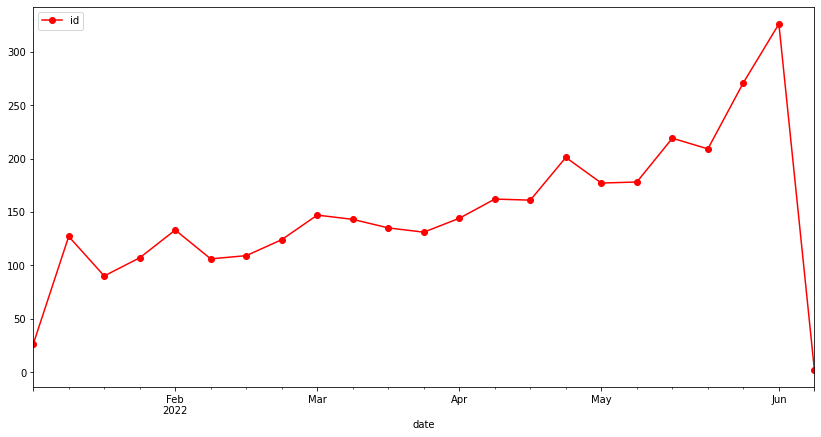

In [80]:
from statsmodels.tsa.api import ExponentialSmoothing

def holt_win_sea(y, y_to_train, y_to_test,seasonal_type, seasonal_period, predict_date):    
    y.plot(marker='o', color='red', legend=True, figsize=(14, 7))
    
    if seasonal_type == 'additive':
        fit1 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add').fit(use_boxcox=True)
        fcast1 = fit1.forecast(predict_date).rename('Additive')
        mse1 = ((fcast1 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, additive seasonal of ' + 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse1), 2)))
        
        fit2 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
        fcast2 = fit2.forecast(predict_date).rename('Additive+damped')
        mse2 = ((fcast2 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, additive seasonal of ' + 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse2), 2)))
        
        fit1.fittedvalues.plot(style='--', color='blue')
        fcast1.plot(style='--', marker='o', color='blue', legend=True)
        fit2.fittedvalues.plot(style='--', color='green')
        fcast2.plot(style='--', marker='o', color='green', legend=True)
    
    elif seasonal_type == 'multiplicative':  
        fit3 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul').fit(use_boxcox=True)
        fcast3 = fit3.forecast(predict_date).rename('Multiplicative')
        mse3 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse3), 2)))
        
        fit4 = ExponentialSmoothing(y_to_train, seasonal_periods = seasonal_period, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
        fcast4 = fit4.forecast(predict_date).rename('Multiplicative+damped')
        mse4 = ((fcast3 - y_to_test) ** 2).mean()
        print('The Root Mean Squared Error of additive damped trend, multiplicative seasonal of '+ 
              'period season_length={} and a Box-Cox transformation {}'.format(seasonal_period,round(np.sqrt(mse4), 2)))
        
        fit3.fittedvalues.plot(style='--', color='blue')
        fcast3.plot(style='--', marker='o', color='blue', legend=True)
        fit4.fittedvalues.plot(style='--', color='green')
        fcast4.plot(style='--', marker='o', color='green', legend=True)
        
    else:
        print('Wrong Seasonal Type. Please choose between additive and multiplicative')

    plt.show()

holt_win_sea(y, y_to_train, y_to_val, 'additive', 52, predict_date)

#### 4. SARIMA

> Help sources: https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-arima-in-python-3
Additional codes can be added: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [82]:
import itertools

def sarima_grid_search(y, seasonal_period):
    p = d = q = range(0, 2)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit()
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

    # print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC: {}'.format(param_mini, param_seasonal_mini, mini))

sarima_grid_search(y, 52)

The set of parameters with the minimum AIC is: SARIMA(0, 0, 0)x(0, 1, 0, 52) - AIC: 2.0


In [84]:
# Call this function after pick the right(p,d,q) for SARIMA based on AIC               
def sarima_eva(y,order, seasonal_order, seasonal_period, pred_date, y_to_test):
    # fit the model 
    mod = sm.tsa.statespace.SARIMAX(y,
                                order=order,
                                seasonal_order=seasonal_order,
                                enforce_stationarity=False,
                                enforce_invertibility=False)

    results = mod.fit()
    print(results.summary().tables[1])
    
    results.plot_diagnostics(figsize=(16, 8))
    plt.show()
    
    # The dynamic=False argument ensures that we produce one-step ahead forecasts, 
    # meaning that forecasts at each point are generated using the full history up to that point.
    pred = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=False)
    pred_ci = pred.conf_int()
    y_forecasted = pred.predicted_mean
    mse = ((y_forecasted - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = False {}'.format(seasonal_period,round(np.sqrt(mse), 2)))

    ax = y.plot(label='observed')
    y_forecasted.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')
    plt.legend()
    plt.show()

    # A better representation of our true predictive power can be obtained using dynamic forecasts. 
    # In this case, we only use information from the time series up to a certain point, 
    # and after that, forecasts are generated using values from previous forecasted time points.
    pred_dynamic = results.get_prediction(start=pd.to_datetime(pred_date), dynamic=True, full_results=True)
    pred_dynamic_ci = pred_dynamic.conf_int()
    y_forecasted_dynamic = pred_dynamic.predicted_mean
    mse_dynamic = ((y_forecasted_dynamic - y_to_test) ** 2).mean()
    print('The Root Mean Squared Error of SARIMA with season_length={} and dynamic = True {}'.format(seasonal_period,round(np.sqrt(mse_dynamic), 2)))

    ax = y.plot(label='observed')
    y_forecasted_dynamic.plot(label='Dynamic Forecast', ax=ax,figsize=(14, 7))
    ax.fill_between(pred_dynamic_ci.index,
                    pred_dynamic_ci.iloc[:, 0],
                    pred_dynamic_ci.iloc[:, 1], color='k', alpha=.2)

    ax.set_xlabel('Date')
    ax.set_ylabel('Sessions')

    plt.legend()
    plt.show()
    
    return (results)

model = sarima_eva(y, (1, 1, 1), (1, 1, 0, 52), 52, '2022-06-06', y_to_val)

ValueError: ignored

In [85]:
def forecast(model, predict_steps, y):
    pred_uc = model.get_forecast(steps=predict_steps)

    # SARIMAXResults.conf_int, can change alpha,the default alpha = .05 returns a 95% confidence interval.
    pred_ci = pred_uc.conf_int()

    ax = y.plot(label='observed', figsize=(14, 7))
    # print(pred_uc.predicted_mean)
    pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
    ax.fill_between(pred_ci.index,
                    pred_ci.iloc[:, 0],
                    pred_ci.iloc[:, 1], color='k', alpha=.25)
    ax.set_xlabel('Date')
    ax.set_ylabel(y.name)

    plt.legend()
    plt.show()
    
    # Produce the forecasted tables 
    pm = pred_uc.predicted_mean.reset_index()
    pm.columns = ['Date','Predicted_Mean']
    pci = pred_ci.reset_index()
    pci.columns = ['Date','Lower Bound','Upper Bound']
    final_table = pm.join(pci.set_index('Date'), on='Date')
    
    return (final_table)

final_table = forecast(model ,52, y)
final_table.head()

NameError: ignored

In [86]:
# Graphs without the confident interval 
pred_uc = model.get_forecast(steps=51)
ax = y.plot(label='Observed', figsize=(14, 7))

# print(pred_uc.predicted_mean)
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.set_xlabel('Date')
ax.set_ylabel(y.name)

plt.legend()
plt.show()

NameError: ignored

In [88]:
# Graphs show only the perdiected period
final_table.index = final_table.Date
fig, ax = plt.subplots( figsize=(14, 7))

# ax.plot(y,marker='.', linestyle='-', linewidth=0.5, label='Weekly')
ax.plot(final_table.Predicted_Mean,marker='.', linestyle='-', linewidth=0.5, label='Predicted Weekly')

# ax.plot(y.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Monthly Mean Resample')
ax.plot(final_table.Predicted_Mean.resample('M').mean(),marker='o', markersize=8, linestyle='-', label='Predicted Monthly Mean Resample')
ax.set_ylabel('ID')
ax.legend();


NameError: ignored